In [1]:
import mpl_toolkits.mplot3d.axes3d as p3
from scipy import stats
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size 
import matplotlib.font_manager
from matplotlib.patches import PathPatch


In [2]:
def find_cog(obj):
    xyz_mean=0
    x = [p[0] for p in obj]
    y = [p[1] for p in obj]
    z = [p[2] for p in obj]
    x_mean = sum(x) / len(obj)
    y_mean = sum(y) / len(obj)
    z_mean = sum(z) / len(obj)
    xyz_mean = [x_mean,y_mean,z_mean]

    return xyz_mean

def move_to_centre(obj,centre):
        x = obj[0]-centre[0]
        y = obj[1]-centre[1]
        z = obj[2]-centre[2]
        return [x,y,z]
    
def car2sphe(xyz):
  
    XY = xyz[0]**2 + xyz[1]**2
    r = np.sqrt(XY + xyz[2]**2)               # r
    theta = np.arctan2(xyz[2],np.sqrt(XY))     # theta
    phi = np.arctan2(xyz[1],xyz[0])     
    return [r,theta,phi]


def project(xyz,radius):
    atoms_dot = []
    atoms_hat_list = []
    new_atoms = [.0,.0,.0]
    new_atoms_list = []
    for i in range (0,len(xyz)):
        
        atoms_temp = xyz[i]
        atoms_dot_temp = np.dot(atoms_temp, atoms_temp) #clean atoms list
        atoms_dot.append(atoms_dot_temp)

        distance = np.sqrt(atoms_dot_temp)
        atoms_hat = []
        for k in range(0,3):
            print(k)
            #print(atoms[i])
            atoms_hat_coord = xyz[i][k] /distance\
        
            #print(xyz[i][k])
            atoms_hat.append(atoms_hat_coord)
        atoms_hat_list.append(atoms_hat)

    for i in range (0, len(xyz)):
        new_atoms[0] = round((atoms_hat_list[i][0] * radius),3)#, * np.sqrt(rad)), 3)
        new_atoms[1] = round((atoms_hat_list[i][1] * radius),3)# * np.sqrt(rad)), 3)
        new_atoms[2] = round((atoms_hat_list[i][2] * radius),3)# * np.sqrt(rad)), 3)


        new_dot = np.dot(new_atoms, new_atoms)
        new_distance = np.sqrt(new_dot)
        print(new_distance)

        new_atoms_list.append(new_atoms)
    return atoms_hat_list


def car2geo(xyz):
    XY = xyz[0]**2 + xyz[1]**2
    r = np.sqrt(XY + xyz[2]**2)               # r
    theta = np.arctan2(xyz[2],np.sqrt(XY))     # theta
    phi = np.arctan2(xyz[1],xyz[0])                           # phi


    latitude = ((theta * (180 / np.pi))+90)%180
    longitude = ((phi * (180 / np.pi))+180)%360
    return [longitude,latitude, r]


def bin(xyz,bin_min,bin_max):
   # rtp=[]
    #xyz=xyz
    select=[]
    r = np.sqrt( xyz[0]**2 + xyz[1]**2 + xyz[2]**2 )

    if bin_min <= r <= bin_max:
        return xyz

        


def get_numbers_from_filename(filename):
    return re.search(r'\d+', filename).group(0)        
        

    
from pylab import cross,dot,inv

def rot(U,V):
    W=cross(U,V)
    A=np.array([U,W,cross(U,W)]).T
    B=np.array([V,W,cross(V,W)]).T
    return dot(B,inv(A))

def load_data(filename):
    df = pd.read_csv (filename, sep ='\s+', header=None)
    df.columns =['atom', 'na', 'restype','resname','a','resn','x','y','z','index','b_value','c'] 
    coordinates =   np.array(df[['x','y','z']])
    b_value =   np.array(df[['b_value']])
    resn =   np.array(df[['resn']])
    resname =   np.array(df[['resname']])
    return coordinates, b_value, resn


def convert2geo(coordinates):
    rtp=[]
    for i in range(0,len(coordinates)):
        rtp.append(car2sphe(coordinates[i]))
    rtp_array=np.array(rtp)
    sum_matrix = rtp_array.sum(axis=0)
    radius=sum_matrix[0]/len(rtp)
    centred_atoms=[]
    for i in range(0,len(coordinates)):
        centred_atoms.append(move_to_centre(coordinates[i],com))
    geo=[]
    for i in range(0,len(centred_atoms)):
        geo.append(car2geo(centred_atoms[i]))
    return geo

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


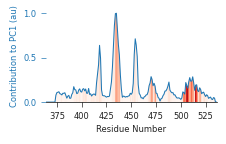

In [6]:
prot='astera'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/astera_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/astera_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)
# ax.set_title('GRAMD1A',size=24)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)
# plt.yticks[0.2,0.4,0.6,0.8,1.0]
# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=8) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500,bbox_inches="tight")

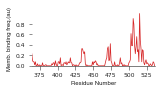

In [66]:
prot='astera'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/astera_resnr364_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


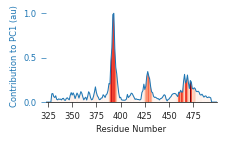

In [7]:
prot='asterc'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/asterc_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/asterc_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)
# ax.set_title('GRAMD1C',size=24)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)
# ax.set_xticks(ax.get_yticks()[::0.2])

#cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()fig.set_size_inches(2.2,1)
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500,bbox_inches="tight")

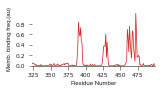

In [65]:
prot='asterc'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/asterc_resnr323_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


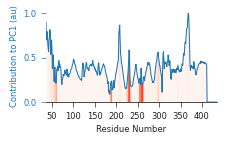

In [8]:
prot='osh6'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/osh6_resnr36_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/osh6_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
size2=6

hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)
# ax.set_title('Osh6',size=24)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500,bbox_inches="tight")

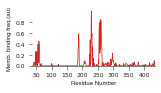

In [32]:
prot='osh6'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/osh6_resnr36_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max())

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


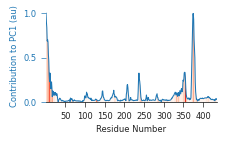

In [9]:
prot='osh4'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/osh4_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/osh4_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
size2=6

hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)
# ax.set_title('osh4',size=24)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500,bbox_inches="tight")

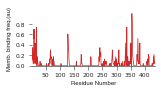

In [24]:
prot='osh4'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/osh4_resnr1_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


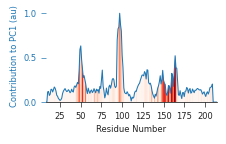

In [10]:
prot='cptp'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/cptp_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/cptp_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# ax.set_title('CPTP',size=24)


# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)


my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# #cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

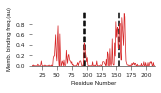

In [74]:
prot='cptp'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/cptp_resnr8_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)

plt.axvline(x=96 , color='black', linestyle='--')
plt.axvline(x=97 , color='black', linestyle='--')
plt.axvline(x=155 , color='black', linestyle='--')

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


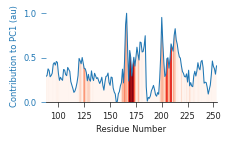

In [11]:
prot='ttpa'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/ttpa_resnr25_betafactor_membranebinding_88to253_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/ttpa_apoholo_pc0_CA_88to253.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('TTPA',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)



my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)


plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

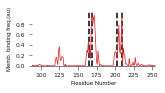

In [72]:
prot='ttpa'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/ttpa_resnr25_betafactor_membranebinding_88to253_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)

plt.axvline(x=165 , color='black', linestyle='--')
plt.axvline(x=169 , color='black', linestyle='--')
plt.axvline(x=202 , color='black', linestyle='--')
plt.axvline(x=209 , color='black', linestyle='--')


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


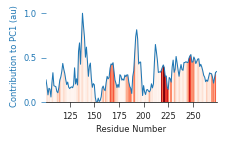

In [12]:
prot='sfh1'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/sfh1_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/sfh1_apoholo_pc0_CA_101to274.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('Sfh1',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)


plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

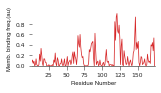

In [34]:
prot='sfh1'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/sfh1_resnr1_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


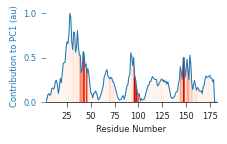

In [13]:
prot='smp'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/esyt_180_resnr191_betafactor_membranebinding_CA_pymol.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/esyt_180_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('E-Syt2',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)


my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

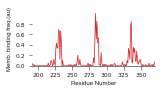

In [36]:
prot='smp'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/esyt_180_resnr191_betafactor_membranebinding_CA_pymol.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


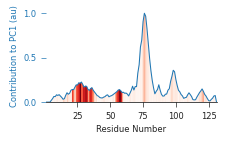

In [14]:
prot='fabp'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/fabp_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/fabp_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('FABP',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

#cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

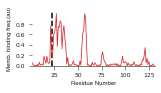

In [69]:
prot='fabp'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/fabp_resnr1_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)

plt.axvline(x=22 , color='black', linestyle='--')


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


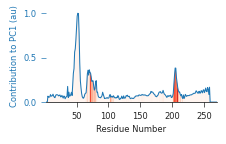

In [15]:
prot='pitpa'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/pitpa_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/pitpa_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('PITPA',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# #cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

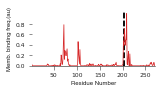

In [73]:
prot='pitpa'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/pitpa_resnr2_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)
plt.axvline(x=203 , color='black', linestyle='--')
plt.axvline(x=204 , color='black', linestyle='--')

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 50)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

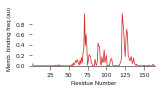

In [38]:
prot='gm2a'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/gm2a_resnr1_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


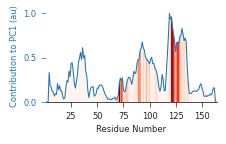

In [16]:
prot='gm2a'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/gm2a_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/apo_holo_pc0_pdb/gm2a_apo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('GM2A',size=24)

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# #cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


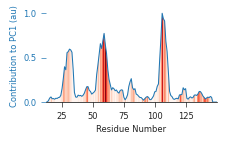

In [17]:
prot='lcn1'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/lcn1_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/apo_holo_pc0_pdb/lcn1_apo_pc0_CA.pdb'
coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)

# ax.set_title('LCN1',size=24)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, y.max(), 0.5)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

#cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)

plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

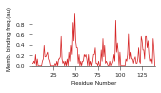

In [40]:
prot='lcn1'

filename='../cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/lcn1_resnr1_betafactor_membranebinding_CA.pdb'

coordinates, b_value, resn = load_data(filename)

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()

def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:red'
size1=6
size2=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Memb. binding freq.(au)", fontsize=size2, labelpad=3, color=axcolor, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)

ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor)


ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

my_yticks= np.arange(0, scaled_y.max(), 0.2)
plt.yticks (my_yticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

fig.set_size_inches(2.2,1)
plt.savefig('../cg_prot_memb/martini_v300/residue_plots/'+prot+'.png',dpi=330,bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


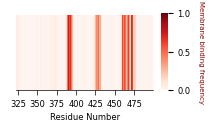

In [4]:
prot='protocol_memb'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/asterc_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/asterc_apoholo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size1, labelpad=3, **hfont)
# ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
# ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
# ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
# ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)
ax.axes.yaxis.set_visible(False)

# ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

poly = ax.fill_between(x, 0, scaled_y, color='none')
img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
# img.set_clip_path(clip_poly)

# my_xticks= np.arange(0, x.max(), 25)
plt.xticks([325,350,375,400,425,450,475],size=6)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

cbar = plt.colorbar(img, ax=ax, aspect=12,ticks=[0,0.5, 1])
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=6) 
cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=5,labelpad=10,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1)

plt.savefig('legend.svg')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


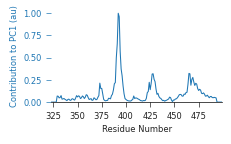

In [18]:
prot='protocol_pc1'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/asterc_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/asterc_apo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("Contribution to PC1 (au)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

# poly = ax.fill_between(x, 0, scaled_y, color='none')
# img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
# clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
# # img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


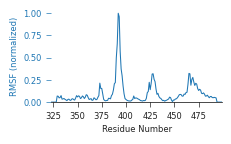

In [19]:
prot='protocol_rmsf'

filename='./cg_prot_memb/martini_v300/memb_binding_residues_beta_factor/asterc_resnr1_betafactor_membranebinding_CA.pdb'
filename2='./andrea_pc_clustering_frames_etc/pc1_memb_binding_same_pdbs/asterc_apo_pc0_CA.pdb'

coordinates, b_value, resn = load_data(filename2)
b_value2 = load_data(filename)[1]

cmap = plt.get_cmap('Reds')

x = resn.flatten()
y = b_value.flatten()
z = b_value2.flatten()
# z[z==0]=np.nan


def NormalizeData(y):
    return (y - np.min(y)) / (np.max(y) - np.min(y))
scaled_y = NormalizeData(y)

def NormalizeData(z):
    return (z - np.min(z)) / (np.max(z) - np.min(z))
scaled_z = NormalizeData(z)



fig, ax = plt.subplots(figsize=(10,5)) 
axcolor = '#222222'
axcolor2 = '#AAAAAA'
axcolor3='tab:blue'
size1=6
hfont = {'fontname':'Helvetica'}
ax.set_facecolor('white')

ax.set_xlabel("Residue Number", fontsize=size2, labelpad=3, **hfont)
ax.set_ylabel("RMSF (normalized)", fontsize=size2, labelpad=3, color=axcolor3, **hfont)
ax.tick_params(axis = 'both', which = 'major', labelsize = size1)
ax.tick_params(width=0.5)


# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# axes colors
ax.xaxis.label.set_color(axcolor)
# ax.yaxis.label.set_color(axcolor2)
ax.tick_params(axis='x', colors=axcolor)
ax.tick_params(axis='y', colors=axcolor3)
# ax.spines['left'].set_color(axcolor2)
# ax.spines['bottom'].set_color(axcolor)

ax.plot(x, scaled_y, lw=0.75, color=axcolor3)

# poly = ax.fill_between(x, 0, scaled_y, color='none')
# img = ax.imshow(scaled_z.reshape(1, -1), extent=[x[0], x[-1], 0, scaled_y.max()], cmap=cmap, aspect='auto', interpolation='bilinear')
# clip_poly = PathPatch(poly.get_paths()[0], transform=ax.transData)
# # img.set_clip_path(clip_poly)

my_xticks= np.arange(0, x.max(), 25)
plt.xticks (my_xticks, size=size1)

plt.xlim(x.min(),x.max())
plt.ylim(0,scaled_y.max()+scaled_y.max()/25)

# cbar = plt.colorbar(img, ax=ax, aspect=30)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_ylabel('Membrane binding frequency', rotation=270,size=size2,labelpad=25,color='darkred', **hfont)
# plt.tight_layout()
fig.set_size_inches(2.2,1.2)
plt.savefig(prot+'_corr_lineplot.png',dpi=500, bbox_inches="tight")